### Illustrating words in given clusters using WordClouds

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
israel_clustered = pd.read_csv('data/Israel_clustered.csv')
israel_clustered.head()

,created_date,subreddit_id,search_query,post_id,comment_id,post_title,comment_original,comment_processed,comment_no_stopwords,upvotes,post_url,comment_url,lix_score,sentiment_score,log_upvotes,log_lix_score,cluster,KMEANS,DBSCAN
0,2024-10-17 17:15:25,Israel,Israel,1g5vzk7,lse50r5,"NEW MEGATHREAD, IT IS OFFICIAL: Israel says Ha...",Imagine being a random soldier in the IDF for ...,imagine being a random soldier in the idf for ...,"imagin random soldier idf onli 9 months, find ...",459,https://www.reddit.com/r/Israel/comments/1g5vz...,https://www.reddit.com/r/Israel/comments/1g5vz...,40.000000,-0.6997,6.131226,3.713572,0,0,-1
1,2024-10-17 17:16:24,Israel,Israel,1g5vzk7,lse57ls,"NEW MEGATHREAD, IT IS OFFICIAL: Israel says Ha...",REST IN PISS TO GAZA’S SEWER RAT!!!!,rest in piss to gaza s sewer rat!!!!,rest piss gaza sewer rat!!!!,141,https://www.reddit.com/r/Israel/comments/1g5vz...,https://www.reddit.com/r/Israel/comments/1g5vz...,2.000000,-0.5951,4.955827,1.098612,2,2,-1
2,2024-10-17 20:27:48,Israel,Israel,1g5vzk7,lsf5ji7,"NEW MEGATHREAD, IT IS OFFICIAL: Israel says Ha...","BBC: “Yahya Sinwar, an approachable family man...","bbc yahya sinwar, an approachable family man a...","bbc yahya sinwar, approach famili man father 9...",138,https://www.reddit.com/r/Israel/comments/1g5vz...,https://www.reddit.com/r/Israel/comments/1g5vz...,52.923077,-0.8158,4.934474,3.987559,0,0,-1
3,2024-10-17 19:15:52,Israel,Israel,1g5vzk7,lserya4,"NEW MEGATHREAD, IT IS OFFICIAL: Israel says Ha...",it looks like ALL EYES ON RAFAH was the right ...,it looks like all eyes on rafah was the right ...,look like eye rafah wa right move along,117,https://www.reddit.com/r/Israel/comments/1g5vz...,https://www.reddit.com/r/Israel/comments/1g5vz...,13.000000,0.3612,4.770685,2.639057,2,2,-1
4,2024-10-17 18:16:29,Israel,Israel,1g5vzk7,lsegr4h,"NEW MEGATHREAD, IT IS OFFICIAL: Israel says Ha...",> When the soldiers entered the building on Th...,when the soldiers entered the building on thur...,"soldier enter build thursday, realiz one dead ...",115,https://www.reddit.com/r/Israel/comments/1g5vz...,https://www.reddit.com/r/Israel/comments/1g5vz...,58.621622,-0.8235,4.753590,4.088018,0,0,-1


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def extract_and_save_tfidf_terms(data, cluster_column, text_column, top_print=5):
    all_tfidf_terms = {}
    tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    clusters = data[cluster_column].unique()
    
    for cluster in clusters:
        # Filter data for the specific cluster
        cluster_data = data[data[cluster_column] == cluster]
        # Fit and transform TF-IDF on the cluster text
        tfidf_matrix = tfidf.fit_transform(cluster_data[text_column])
        feature_names = tfidf.get_feature_names_out()
        tfidf_scores = tfidf_matrix.sum(axis=0).A1
        tfidf_df = pd.DataFrame({
            'term': feature_names,
            'score': tfidf_scores
        }).sort_values(by='score', ascending=False)
        
        # Save all terms and scores for this cluster
        all_tfidf_terms[cluster] = dict(zip(tfidf_df['term'], tfidf_df['score']))
        
        # Print a few top terms as an example
        print(f"\nCluster {cluster}: Top {top_print} TF-IDF Terms (as an example):\n")
        print(tfidf_df.head(top_print).to_string(index=False))
    
    return all_tfidf_terms


tfidf_terms = extract_and_save_tfidf_terms(israel_clustered, 'KMEANS', 'comment_no_stopwords', top_print=5)



Cluster 0: Top 5 TF-IDF Terms (as an example):

       term     score
     israel 44.472367
        thi 33.503359
      peopl 29.385121
palestinian 25.521759
        jew 22.928528

Cluster 2: Top 5 TF-IDF Terms (as an example):

  term    score
   thi 8.621140
israel 6.984567
  like 5.404335
  love 5.218909
    go 4.670731

Cluster 1: Top 5 TF-IDF Terms (as an example):

  term     score
israel 36.206276
   thi 27.499552
 peopl 20.081441
  like 19.930448
    wa 17.873479

Cluster 3: Top 5 TF-IDF Terms (as an example):

       term     score
     israel 27.185314
        thi 24.362422
palestinian 17.774878
         wa 17.266887
      peopl 17.243998


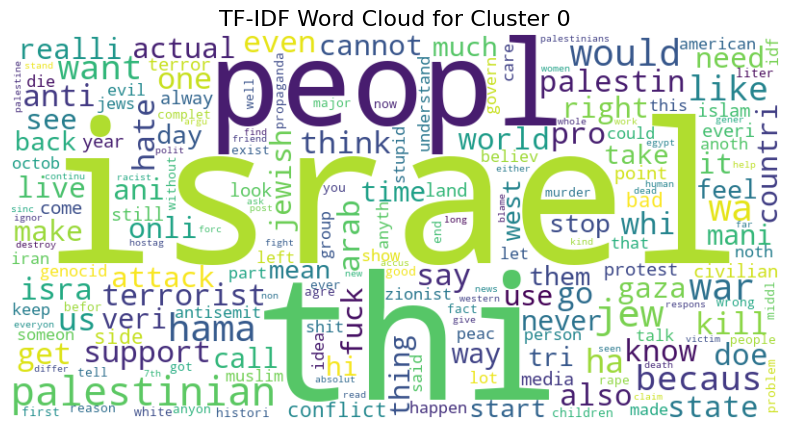

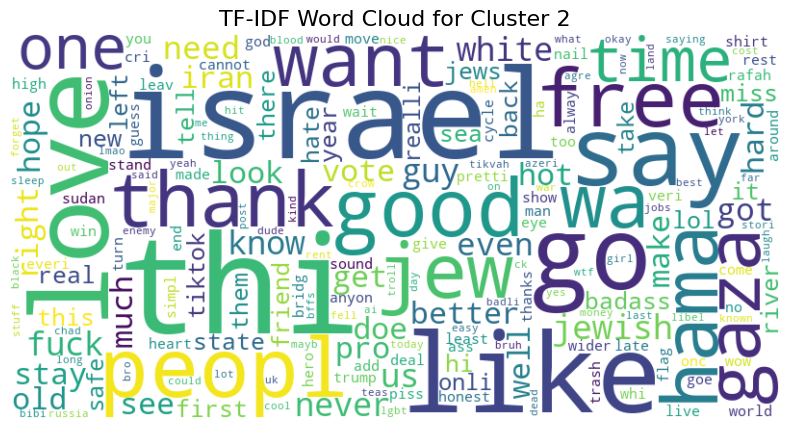

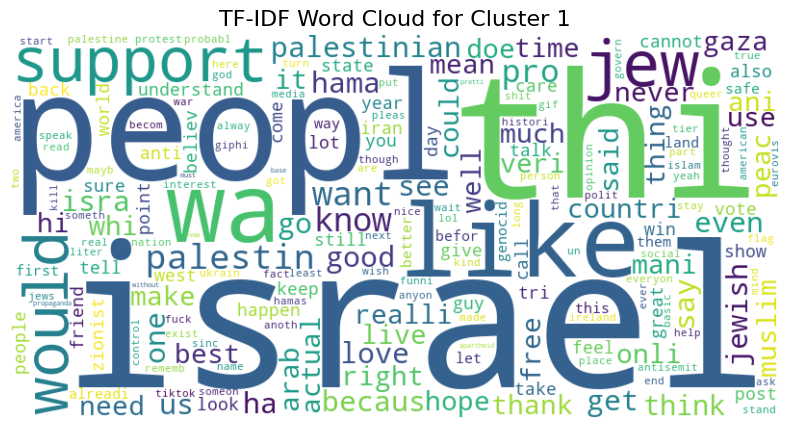

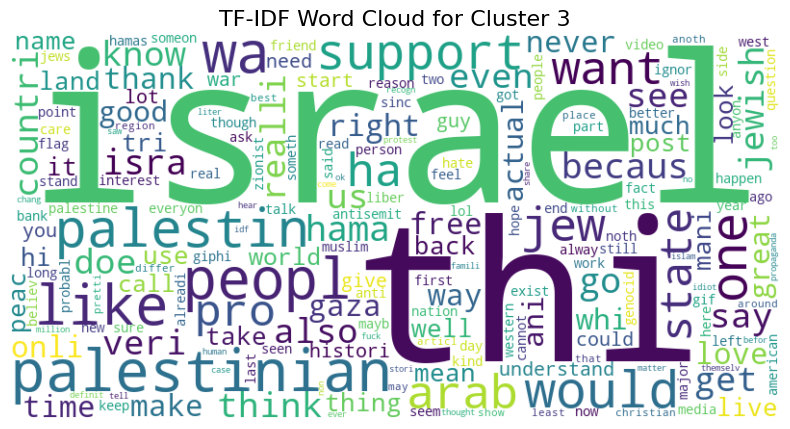

In [5]:
def generate_wordclouds_from_saved_terms(tfidf_terms):
    for cluster, tfidf_dict in tfidf_terms.items():
        # Generate a word cloud using TF-IDF scores
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tfidf_dict)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"TF-IDF Word Cloud for Cluster {cluster}", fontsize=16)
        plt.show()

generate_wordclouds_from_saved_terms(tfidf_terms)